In [1]:
import os
initial_dir = os.getcwd()
print(initial_dir)

/home/kalmar/Mathematics/Research/MPI Tuebingen/TDA-Cause-Effect-Pairs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import sys
import time

sys.path.append("/home/kalmar/Mathematics/Research/MPI Tuebingen/Dionysus-python3/build/bindings/python")
import dionysus

%reload_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

tda = __import__("TDA")
tsp = __import__("topology-summary-plotter")
out_i = __import__("identify-outliers")
sampler = __import__("points-sampler")
os.chdir(initial_dir)

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


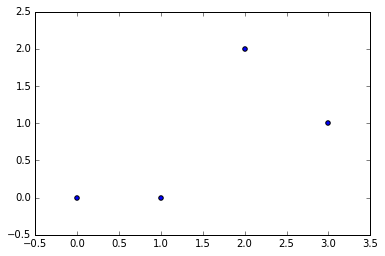

[[ 0.          3.16227766  1.          2.82842712]
 [ 3.16227766  0.          2.23606798  1.41421356]
 [ 1.          2.23606798  0.          2.23606798]
 [ 2.82842712  1.41421356  2.23606798  0.        ]]


In [34]:
from scipy.spatial.distance import cdist
pts = np.array([[0,0],[3,1],[1,0],[2,2]])
plt.scatter(pts[:,0], pts[:,1])
plt.show()
distances = cdist(pts, pts)
print(distances)

In [14]:
def exact_rips_graph(points, radius):
    full_complex = dionysus.Filtration()
    distances = cdist(points, points)
    for i in range(points.shape[0]):
        full_complex.append(dionysus.Simplex([i], 0))
        for j in range(i+1, points.shape[0]):
            d = distances[i][j]
            if d <= radius:
                full_complex.append(dionysus.Simplex([i, j], float(d)))
    return full_complex

def exact_rips_graph2(points, radius):
    full_complex = []
    distances = cdist(points, points)
    for i in range(points.shape[0]):
        full_complex.append(dionysus.Simplex([i], 0))
        for j in range(i+1, points.shape[0]):
            d = distances[i][j]
            if d <= radius:
                full_complex.append(dionysus.Simplex([i, j], float(d)))
    fcomplex = dionysus.Filtration(full_complex)
    return fcomplex

def alpha_complex(points):
    alpha_complex = dionysus.Filtration()
    dionysus.fill_alpha_complex(points.tolist(), alpha_complex)

    return alpha_complex

def dion_rips_graph(points, radius):
    rips_complex = dionysus.Filtration()
    distances = dionysus.PairwiseDistances(points.tolist())
    rips = dionysus.Rips(distances)
    rips.generate(1,radius, rips_complex.append)
    for s in rips_complex:
        s.data = rips.eval(s)
    return rips_complex

In [5]:
r = 4
X = exact_rips_graph(pts,r)
Y = dion_rips_graph(pts,r)
Z = alpha_complex(pts)
print("exact:")
for s in X:
    print(s,"\t\t",s.data)
print("dion")
for s in Y:
    print(s, "\t", s.data)

for s in Z:
    print(s, "\t\t", s.data)

exact:
<0> 		 0
<0, 1> 3.162278 		 3.1622776601683795
<0, 2> 1.000000 		 1.0
<0, 3> 2.828427 		 2.8284271247461903
<1> 		 0
<1, 2> 2.236068 		 2.23606797749979
<1, 3> 1.414214 		 1.4142135623730951
<2> 		 0
<2, 3> 2.236068 		 2.23606797749979
<3> 		 0
dion
<0> 0.000000 	 0.0
<0, 1> 3.162278 	 3.1622776601683795
<0, 2> 1.000000 	 1.0
<0, 3> 2.828427 	 2.8284271247461903
<1> 0.000000 	 0.0
<1, 2> 2.236068 	 2.23606797749979
<1, 3> 1.414214 	 1.4142135623730951
<2> 0.000000 	 0.0
<2, 3> 2.236068 	 2.23606797749979
<3> 0.000000 	 0.0
<0> 		 (0.0, True)
<0, 2> 		 (0.25, True)
<0, 2, 3> 		 (2.5, True)
<0, 3> 		 (2.5, False)
<1> 		 (0.0, True)
<1, 2> 		 (1.25, True)
<1, 2, 3> 		 (1.3888888888888888, True)
<1, 3> 		 (0.5, True)
<2> 		 (0.0, True)
<2, 3> 		 (1.25, True)
<3> 		 (0.0, True)


In [6]:
X.sort(dionysus.data_dim_cmp)
Y.sort(dionysus.data_dim_cmp)
Z.sort(dionysus.data_dim_cmp)
for s in X:
    print(s,"\t\t",s.data)
print("dion")
for s in Y:
    print(s, "\t", s.data)
for s in Z:
    print(s, "\t\t", s.data)

<0> 		 0
<1> 		 0
<2> 		 0
<3> 		 0
<0, 2> 1.000000 		 1.0
<1, 3> 1.414214 		 1.4142135623730951
<1, 2> 2.236068 		 2.23606797749979
<2, 3> 2.236068 		 2.23606797749979
<0, 3> 2.828427 		 2.8284271247461903
<0, 1> 3.162278 		 3.1622776601683795
dion
<0> 0.000000 	 0.0
<1> 0.000000 	 0.0
<2> 0.000000 	 0.0
<3> 0.000000 	 0.0
<0, 2> 1.000000 	 1.0
<1, 3> 1.414214 	 1.4142135623730951
<1, 2> 2.236068 	 2.23606797749979
<2, 3> 2.236068 	 2.23606797749979
<0, 3> 2.828427 	 2.8284271247461903
<0, 1> 3.162278 	 3.1622776601683795
<0> 		 (0.0, True)
<1> 		 (0.0, True)
<2> 		 (0.0, True)
<3> 		 (0.0, True)
<0, 2> 		 (0.25, True)
<1, 3> 		 (0.5, True)
<1, 2> 		 (1.25, True)
<2, 3> 		 (1.25, True)
<0, 3> 		 (2.5, False)
<1, 2, 3> 		 (1.3888888888888888, True)
<0, 2, 3> 		 (2.5, True)


In [7]:
def print_ppairs(fcomplex):
    p = dionysus.StaticPersistence(fcomplex)
    p.pair_simplices()
    smap = p.make_simplex_map(fcomplex)
    for i in p:
        if i.sign():
            birth = smap[i]
            if i.unpaired():
                death = np.inf
                print(birth, birth.data, np.inf)
            else:
                death = smap[i.pair()]
                print(birth, birth.data, death, death.data)
print_ppairs(X)
print_ppairs(Y)

<0> 0 inf
<1> 0 <1, 2> 2.236068 2.23606797749979
<2> 0 <0, 2> 1.000000 1.0
<3> 0 <1, 3> 1.414214 1.4142135623730951
<2, 3> 2.236068 2.23606797749979 inf
<0, 3> 2.828427 2.8284271247461903 inf
<0, 1> 3.162278 3.1622776601683795 inf
<0> 0.000000 0.0 inf
<1> 0.000000 0.0 <1, 2> 2.236068 2.23606797749979
<2> 0.000000 0.0 <0, 2> 1.000000 1.0
<3> 0.000000 0.0 <1, 3> 1.414214 1.4142135623730951
<2, 3> 2.236068 2.23606797749979 inf
<0, 3> 2.828427 2.8284271247461903 inf
<0, 1> 3.162278 3.1622776601683795 inf


In [8]:
pattern = re.compile('pair00..\.txt')
files = sorted([x for x in os.listdir('./pairs/') if pattern.match(x)])
file_names = []
dir_names = []
for f in files:
    with open("./pairs/" + f) as points:
        x = points.readline()
        if len(x.split()) > 2:
            file_names.append(f)
            dir_names.append(f[:-4])
            
for i, f in enumerate(file_names):
    x = np.loadtxt('./pairs/'+f)
    print(i, f, x.shape)

0 pair0052.txt (10226, 8)
1 pair0053.txt (989, 4)
2 pair0054.txt (392, 5)
3 pair0055.txt (72, 32)
4 pair0071.txt (120, 8)
5 pair0081.txt (365, 3)
6 pair0082.txt (365, 3)
7 pair0083.txt (365, 3)


In [58]:
i = 0
large_points = np.loadtxt('./test/'+dir_names[i]+"/std_points")
print(large_points.shape)
large_points[35]

(1000, 8)


array([-1.17996191, -1.1917694 , -1.19192119, -1.1937901 , -1.19398377,
       -1.18474752, -1.17454669, -1.18031037])

In [25]:
%lprun -f exact_rips_graph exact_rips_graph(large_points[:3000],2)

In [29]:
%timeit exact_rips_graph(large_points[:3000],2)

1 loops, best of 3: 2.4 s per loop


In [27]:
%lprun -f exact_rips_graph2 exact_rips_graph2(large_points[:3000],2)

In [30]:
%timeit exact_rips_graph2(large_points[:3000],2)

1 loops, best of 3: 2.32 s per loop


In [13]:
cmplx = exact_rips_graph(large_points, 3)
cmplx.sort(dionysus.data_dim_cmp)
print(len(cmplx))

245770


In [12]:
z = tda.FilteredComplex(cmplx)
print(z.inf_life_0)
print(sorted(z.h_0, key=lambda x: x[1]))


[[0, inf]]
[[0, 0.0013687095483630044], [0, 0.003440774310426116], [0, 0.005171342964162924], [0, 0.007210582255375686], [0, 0.008322630139678936], [0, 0.00877656270398717], [0, 0.009723865308145294], [0, 0.009948801592492987], [0, 0.010278796441728173], [0, 0.01042384892700494], [0, 0.010791890409827384], [0, 0.011318866759328743], [0, 0.011493809210818157], [0, 0.012024343045771145], [0, 0.012421474557886452], [0, 0.012444439155489468], [0, 0.012507965026634574], [0, 0.01256027300991351], [0, 0.012786581505108082], [0, 0.013031485463122465], [0, 0.013155258428551826], [0, 0.01345966189853377], [0, 0.013506195410702459], [0, 0.013830177734360127], [0, 0.013887692738593844], [0, 0.01407627570071397], [0, 0.01422917463709148], [0, 0.014757265677143791], [0, 0.014934518717759433], [0, 0.0150141520251785], [0, 0.015042596699871218], [0, 0.015065884627559183], [0, 0.015224510350988261], [0, 0.01538998147355171], [0, 0.01544922639638001], [0, 0.01548891664453715], [0, 0.015585212327541119],

In [39]:
def exact_rips_graph2(points, radius):
    full_complex = []
    distances = cdist(points, points)
    for i in range(points.shape[0]):
        full_complex.append(dionysus.Simplex([i], float(0)))
        for j in range(i+1, points.shape[0]):
            d = distances[i][j]
            if d <= radius:
                full_complex.append(dionysus.Simplex([i, j], float(d)))
    fcomplex = dionysus.Filtration(full_complex)
    return fcomplex

def exact_rips_graph3(points, radius):
    full_complex = []
    distances = cdist(points, points)
    for i in range(points.shape[0]):
        full_complex.append(dionysus.Simplex([i], float(0)))
        for j in range(i+1, points.shape[0]):
            d = distances[i][j]
            if d <= radius:
                full_complex.append(dionysus.Simplex([i, j], float(d)))
    return full_complex

In [38]:
runs = 5
timings = []
for j in range(100, 1001, 100):
    time_to_build = 0
    time_to_sort = 0
    for i in range(runs):
        begin = time.clock()
        X = exact_rips_graph2(large_points[:j],3)
        end = time.clock()
        time_to_build += end-begin
        X.sort(dionysus.data_dim_cmp)
        end2 = time.clock()
        time_to_sort += end2-end
    
    timings.append([j,len(X), time_to_build/runs, time_to_sort/runs])
    print(timings[-1],flush=True)

[100, 2525, 0.03113499999999476, 0.12468059999999923]
[200, 9772, 0.11999439999999595, 0.5699761999999964]
[300, 22609, 0.27760560000000395, 1.4675428000000124]
[400, 40340, 0.4966766000000007, 2.8135058000000184]
[500, 61987, 0.7591194000000201, 4.583839199999977]
[600, 89225, 1.0941898000000152, 6.670597799999984]
[700, 120787, 1.4821686000000114, 9.516076999999996]
[800, 157525, 1.9359797999999955, 12.319442600000013]
[900, 199384, 2.441266200000018, 15.766211799999997]
[1000, 245770, 3.0112927999999783, 20.559188200000015]


In [42]:
runs = 5
timings3 = []
for j in range(100, 1001, 100):
    time_to_build = 0
    time_to_sort = 0
    time_for_filtration = 0
    for i in range(runs):
        begin = time.clock()
        X = exact_rips_graph3(large_points[:j],3)
        end = time.clock()
        time_to_build += end-begin
        X.sort(key = lambda x: x.data)
        end2 = time.clock()
        time_to_sort += end2-end
        Z = dionysus.Filtration(X)
        end3 = time.clock()
        time_for_filtration += end3-end2
        
    timings3.append([j,len(X), time_to_build/runs, time_to_sort/runs, time_for_filtration/runs])
    print(timings3[-1],flush=True)

[100, 2525, 0.04035180000003038, 0.003851800000006733, 0.008088399999974172]
[200, 9772, 0.1109981999999718, 0.016341400000010255, 0.0140920000000051]
[300, 22609, 0.25518359999998663, 0.038226200000008245, 0.0380692000000181]
[400, 40340, 0.4605758000000151, 0.07031200000001263, 0.07663800000000265]
[500, 61987, 0.7241253999999799, 0.11260580000002847, 0.12818899999997485]
[600, 89225, 1.0418586000000005, 0.16456939999998213, 0.19916819999998553]
[700, 120787, 1.4049807999999984, 0.22843380000001617, 0.28740040000000133]
[800, 157525, 1.8316825999999764, 0.3234344000000192, 0.38600759999999357]
[900, 199384, 2.2901462000000263, 0.4417251999999735, 0.5066916000000219]
[1000, 245770, 2.8347440000000232, 0.5714527999999973, 0.672811999999999]


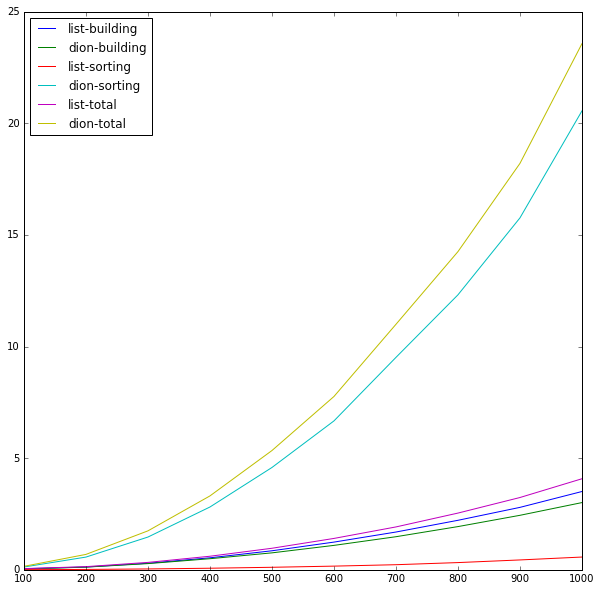

In [57]:
t1 = np.array(timings)
t3 = np.array(timings3)
plt.figure(figsize=(10,10))
plt.plot(t3[:,0],t3[:,2]+t3[:,4], label="list-building")
plt.plot(t1[:,0],t1[:,2], label="dion-building")
plt.plot(t3[:,0],t3[:,3], label="list-sorting")
plt.plot(t1[:,0],t1[:,3], label="dion-sorting")
plt.plot(t3[:,0],t3[:,2]+t3[:,3]+t3[:,4], label="list-total")
plt.plot(t1[:,0],t1[:,2]+t1[:,3], label="dion-total")

plt.legend(loc=0)
plt.show()